## This notebook is meant to do basic data exploration on FanAI DC datasets. The goal is to understand some of the underlying features of the data which can help in segmentation and feature engineering.

 Let's import relevant packages.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import chisquare
import os
import seaborn as sns
sns.set()
from pandas import datetime
import pandas_profiling

import sklearn.preprocessing as preprocessing
from pandas import Series
from statsmodels.tsa.stattools import adfuller

Read all the data files and do a basic profile report.

In [2]:
data_dir = '/Users/aprakash/LA_IDX_2019/FanAI/data/'

customers = pd.read_csv(data_dir+ 'customers.csv')
final_sales = pd.read_csv(data_dir+ 'final_sales.csv')
products = pd.read_csv(data_dir+ 'products.csv')
transactions = pd.read_csv(data_dir+ 'transactions.csv')


In [3]:
pandas_profiling.ProfileReport(customers)
pandas_profiling.ProfileReport(final_sales)
pandas_profiling.ProfileReport(products)
pandas_profiling.ProfileReport(transactions)

Number of variables,5
Number of observations,817741
Total Missing (%),0.0%
Total size in memory,31.2 MiB
Average record size in memory,40.0 B
Numeric,4
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Demographic analysis

The distribution is consistent with US male weight distribution.

199.6709335681843


Text(0.5, 0, 'Customer Weight(lb)')

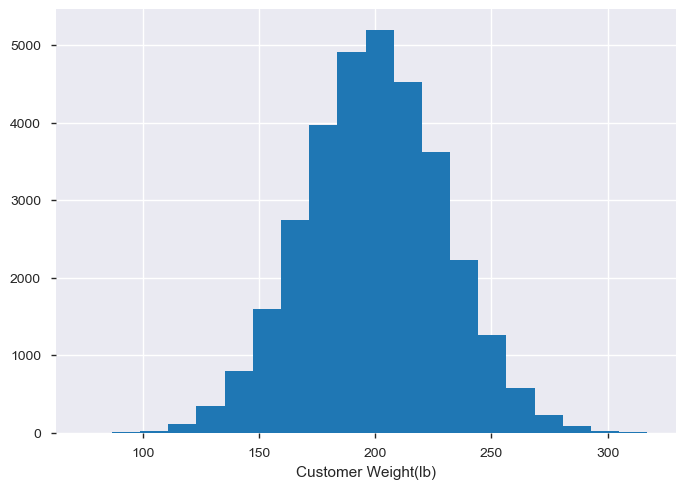

In [4]:
print(np.mean(customers['weight_lb']))
plt.hist(customers['weight_lb'], bins=20)
plt.xlabel('Customer Weight(lb)')

The height distribution is consistent with US male population distribution.

Text(0.5, 0, 'Customer Heights (feet)')

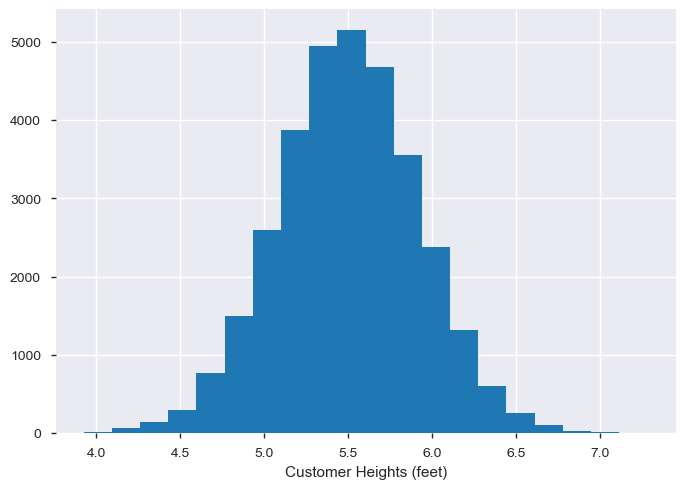

In [5]:
plt.hist(customers['height_inchess']/12.0, bins=20)
plt.xlabel('Customer Heights (feet)')

Most of the consumers fall in the age group 25-55 years. Based on this histogram, age group codes can be
assigned numerical values (for modeling). The mid point of age group is the choosen numerical value for each group
For example: B(25-29) = 27, C(30-34) = 32 and so on. 
    For K, (unknown), combine it with J with (J,K) = 75
    For A, I will use the upper limit 24

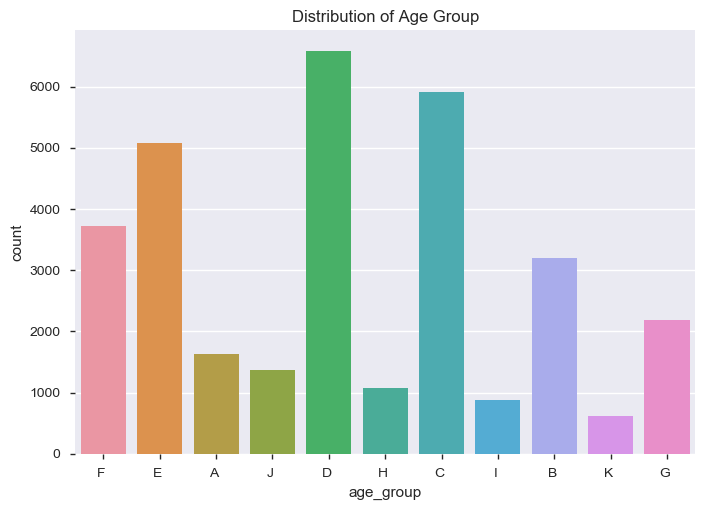

In [6]:
# See the distribution of age_group to recognize different distributions
sns.countplot(x='age_group', data=customers);
plt.title('Distribution of Age Group');

Most of the consumers live closer to the store and fall in group E and F.
Based on this histogram, I create a new binary feature which is the distance from the store.
E, F are close (==0),
rest all are far

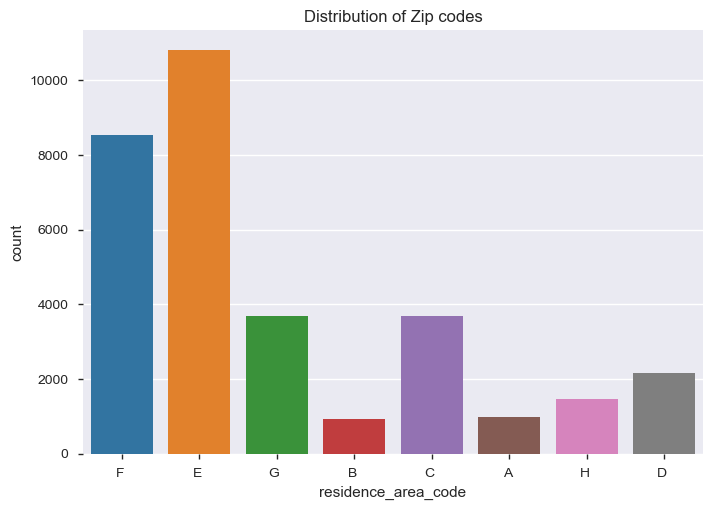

In [7]:
# See the distribution of zip-code to recognize different distributions
sns.countplot(x='residence_area_code', data=customers);
plt.title('Distribution of Zip codes');
plt.savefig('zip_code_hist.pdf')

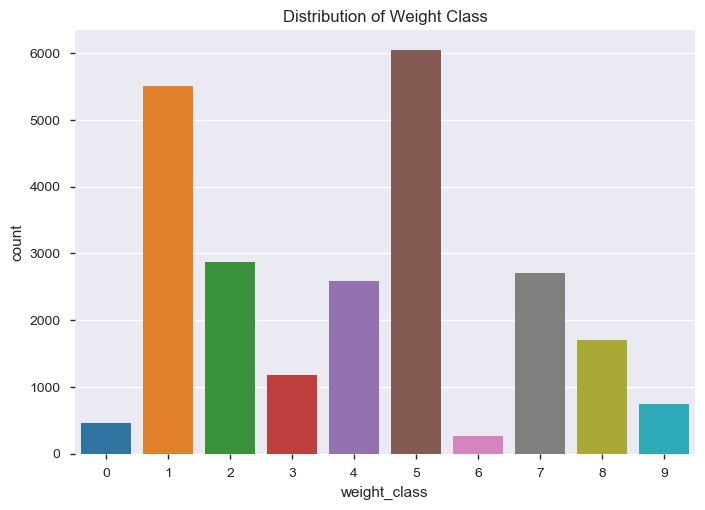

In [8]:
sns.countplot(x='weight_class', data=products);
plt.title('Distribution of Weight Class');
plt.savefig('Product_class_hist.pdf')

#### Most of the consumers spend < 1000 dollars. Goal is to classify customers who will spend more than 1500 dollars. The training dataset for classification will be extremely unbalanced towards low-spending customer. This should be kept in mind while building a model.

Text(0, 0.5, '# of Users')

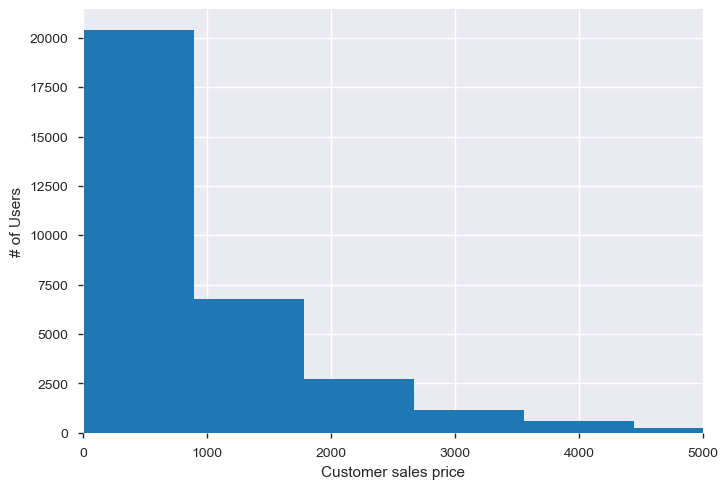

In [9]:
plt.hist(final_sales['sales_price'], bins=500)
plt.xlabel('Customer sales price')
plt.xlim(0,5000)
plt.ylabel('# of Users')


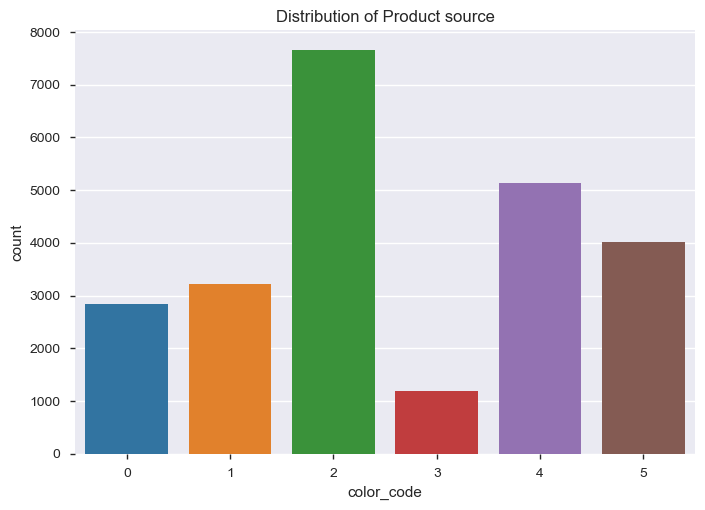

In [10]:
sns.countplot(x='color_code', data=products);
plt.title('Distribution of Product source');

In [11]:
final_sales.head()


,customer_id,sales_price,transaction_date
0,1069,290,2001-02-10
1,1113,628,2001-01-06
2,1250,849,2001-02-10
3,1359,364,2000-12-04
4,1823,433,2001-01-24


In [12]:
transactions.head()

,transaction_date,customer_id,product_id,quantity,sales_price
0,2001-01-01,141833,4710105011011,2,52
1,2001-01-01,1376753,4710265849066,1,129
2,2001-01-01,1603071,4712019100607,1,39
3,2001-01-01,1738667,4710168702901,1,119
4,2001-01-01,2141497,4710431339148,1,159


In [13]:
print(len(np.unique(transactions['customer_id'])))
print(len(np.unique(transactions['product_id'])))

32266
23812


In [14]:
print(len(final_sales[final_sales['sales_price'] > 1500]))
print(len(final_sales[final_sales['sales_price'] <= 1500]))

6605
25661
